In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Arm:
    def __init__(self, p):
        self.p = p
    
    def pull(self):
        return np.random.binomial(1, self.p)

class MultiBandit:
    def __init__(self, probs = [0.1, 0.2, 0.7, 0.5]):
        self.__arms = [Arm(p) for p in probs]
        self.__regret = 0
        self.__maxp = max(probs)

    def num_arms(self):
        return len(self.__arms)

    def pull(self, arm_num):
        reward = self.__arms[arm_num].pull()
        self.__regret += self.__maxp-self.__arms[arm_num].p
        return reward
    
    def regret(self):
        return self.__regret

In [3]:
class EpsilonGreedyAlgorithm:
    def __init__(self, num_arms, horizon, epsilon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.epsilon = epsilon                      # epsiolon value for the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        mean=[]
        for _ in range(self.num_arms):
            if self.arm_pulls[_] != 0:
                mean.append(self.arm_rewards[_]/self.arm_pulls[_])
            else:
                mean.append(self.arm_rewards[_])
        print(mean)
        return np.argmax(mean)

    def select_arm(self):
        # Select arm at each time step. You are supposed to return the index of which 
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.num_arms)
        else:
            return self.give_best_arm()
        # arm has been selected to pull at this timestep

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.select_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep
    
    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        plt.title('Regret vs Timestep - Epsilon Greedy')
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.legend()
        plt.plot(self.regrets, label='Epsilon Greedy')
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.9285714285714286, 0.0]
[0.0, 0.0, 0.9333333333333333, 0.0]
[0.0, 0.0, 0.9375, 0.0]
[0.0, 0.0, 0.9411764705882353, 0.0]
[0.0, 0.0, 0.9444444444444444, 0.0]
[0.0, 0.0, 0.8947368421052632, 0.0]
[0.0, 0.0, 0.9, 0.0]
[0.0, 0.0, 0.9047619047619048, 0.0]
[0.0, 0.0, 0.9090909090909091, 0.0]
[0.0, 0.0, 0.9130434782608695, 0.0]
[0.0, 0.0, 0.9166666666666666, 0.0]
[0.0, 0.0, 0.92, 0.0]
[0.0, 0.0, 0.8846153846153846, 0.0]
[0.0, 0.0, 0.8888888888888888, 0.0]
[0.0, 0.0, 0.8571428571428571, 0.0]
[0.0, 0.0, 0.8620689655172413, 0.0]
[0.0, 0.0, 0.8666666666666667, 0.0]
[0.0, 0.0, 0.8709677419354839, 0.0]
[0.0, 0.0, 0.84375, 0.0]
[0.0, 0.0, 0.8181818181818182, 0.0]
[0.0, 0.0, 0.8235294117647058, 0.0]
[0

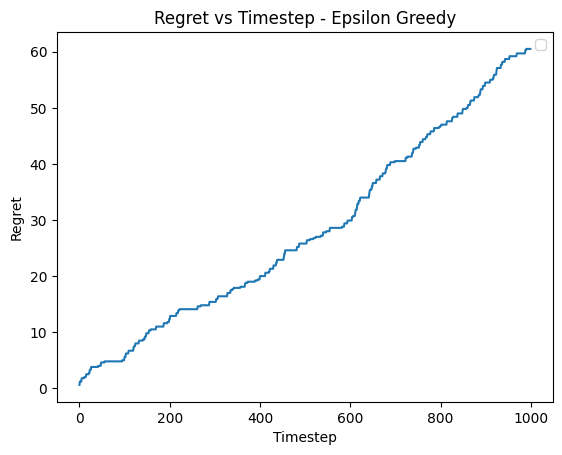

In [4]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

# Create  Algorithm instance
algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=1000, epsilon=0.2)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [5]:
class UCBAlgorithm:
    def __init__(self, num_arms, horizon, c):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.const = c
        self.timestep = 0                           # The current timestep while running the algorithm
        self.arm_pulls = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon
        

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        timestep_arr=np.ones(self.num_arms)
        timestep_arr = timestep_arr*self.timestep
        interval_arr = (self.arm_rewards/self.arm_pulls) + np.sqrt(self.const*np.log(timestep_arr+1)/(self.arm_pulls))
        return np.argmax(interval_arr)

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.give_best_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            self.arm_pulls[arm_to_pull] += 1            # Update the arm pull count and arm reward count
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep
    
    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        plt.title('Regret vs Timestep - UCB')
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.legend()
        plt.plot(self.regrets, label='UCB Algorithm')
        plt.show()
        

C:\Users\Kat\AppData\Local\Temp\ipykernel_3560\902448804.py:17: RuntimeWarning: invalid value encountered in divide
  interval_arr = (self.arm_rewards/self.arm_pulls) + np.sqrt(self.const*np.log(timestep_arr+1)/(self.arm_pulls))
C:\Users\Kat\AppData\Local\Temp\ipykernel_3560\902448804.py:17: RuntimeWarning: divide by zero encountered in divide
  interval_arr = (self.arm_rewards/self.arm_pulls) + np.sqrt(self.const*np.log(timestep_arr+1)/(self.arm_pulls))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total Regret after 100 timesteps: 31.39999999999999 with assumed best arm 2


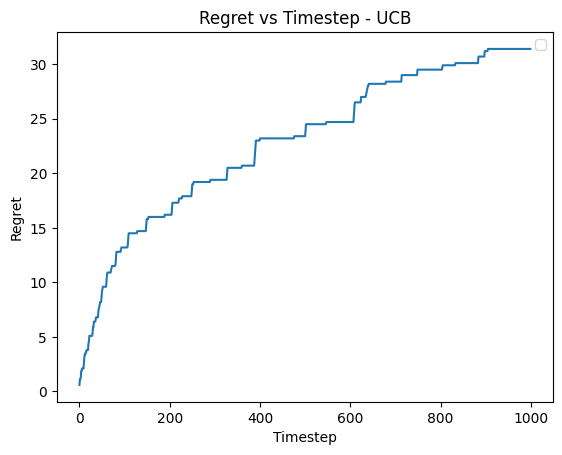

In [6]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

#Coefficient of confidence band term
c=1.5

# Create  Algorithm instance
# algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=1000, epsilon=0.2)
algorithm = UCBAlgorithm(num_arms=bandit.num_arms(), horizon=1000, c=c)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()

In [7]:
class ThompsonAlgorithm:
    def __init__(self, num_arms, horizon):
        # Initialize our algorithm
        self.num_arms = num_arms                    # Number of arms present in the bandit
        self.horizon = horizon                      # Total Horizon of the algorithm
        self.timestep = 0                           # The current timestep while running the algorithm
        self.successes = np.zeros(num_arms)         # History of number of times each arm was pulled
        self.failures = np.zeros(num_arms)
        self.arm_rewards = np.zeros(num_arms)       # History of the total reward accumulated by each arm
        self.regrets = np.zeros(horizon)            # Total regret at each timestep of the horizon
        

    def give_best_arm(self):
        # Return the arm which the algorithm considers to be the best arm at end of algorithm
        sample = np.random.beta(self.successes+1, self.failures+1)
        return np.argmax(sample)

    def run_algorithm(self, bandit):
        # This is the proper algorithm. Already completed
        for _ in range(self.horizon):
            arm_to_pull = self.give_best_arm()             # Select the arm using the algorithm
            reward = bandit.pull(arm_to_pull)           # Pull the arm and find our the reward
            if reward == 1:
                self.successes[arm_to_pull]+=1
            else:
                self.failures[arm_to_pull]+=1
            self.arm_rewards[arm_to_pull] += reward
            self.timestep += 1                          # Update the timestep
            self.regrets[_] = bandit.regret()           # Store the regret values at each timestep
    
    def plot(self):
        # Plot the regret graph. Label the X and Y Axis properly using matplotlib library
        plt.title('Regret vs Timestep - Thompson')
        plt.xlabel('Timestep')
        plt.ylabel('Regret')
        plt.legend()
        plt.plot(self.regrets, label='Thompson Scaling Algorithm')
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total Regret after 100 timesteps: 10.599999999999996 with assumed best arm 2


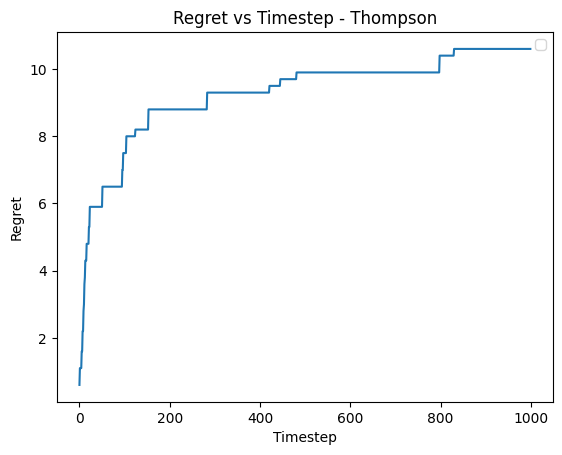

In [10]:
# Define a MultiBandit instance
bandit = MultiBandit()
# bandit = MultiBandit([0.1, 0.5, 0.8, 0.3, 0.4])   # Make custom Multi-armed Bandit. Should work while grading code

# Set the horizon size
H = 100

#Coefficient of confidence band term
c=1.5

# Create  Algorithm instance
# algorithm = EpsilonGreedyAlgorithm(num_arms=bandit.num_arms(), horizon=1000, epsilon=0.2)
algorithm = ThompsonAlgorithm(num_arms=bandit.num_arms(), horizon=1000)

# Run the algorithm
algorithm.run_algorithm(bandit)

# Display total regret
print(f"Total Regret after {H} timesteps: {bandit.regret()} with assumed best arm {algorithm.give_best_arm()}")
algorithm.plot()